# Projeto 1 - Ciência dos Dados
___

## Introdução da organização:

**European Atomic Energy Community (EAEC ou Euratom)** é uma organização internacional criada pelo Tratado Euratom em 25 de Março de 1957 com o objetivo inicial de criar um mercado especializado para a energia nuclear na Europa, desenvolvendo energia nuclear e distribuindo-a aos seus Estados-Membros e vendendo o excedente a estados não membros. No entanto, ao longo dos anos, o seu âmbito foi consideravelmente aumentado para abranger uma grande variedade de áreas associadas à energia nuclear e radiações ionizantes, assim como garantir que materiais nucleares e radiações sejam armazenadas de forma segura. Também auxilia na construção do ITER (International Thermonuclear Experimental Reactor) que é um projeto de reator experimental considerado a próxima fase na evolução da energia nuclear.

## Pergunta (s) a ser respondida:

**Pergunta:** Países que fazem parte da EAEC possuem menos gastos e baixa no cosumo de petróleo do que os que não fazem?


## Explicação da hipótese e mecanismo:

**Hipótese :** Com o aumento do uso de energia nuclear, os países participantes passam a fazer mais uso dessa energia diminuindo o consumo de petróleo, que é a fonte de energia mais utilizada no resto do planeta.

**Mecanismo:** Com o desenvolvimento do mercado de energia nuclear os países que produzem mais do que consomem acabam destribuindo para os estados membros que necessitam, assim, tanto os que produzem quanto os que consomem acabam necessitando cada vez menos do petróleo para gerar energia obtendo uma baixa no seu consumo.

## Bases de dados usadas:

Dados da **produção de energia nuclear** foi retirado do The World Bank. 

Dados do **consumo e produção de petróleo** foram retirados do site da BP (British Petroleum), que é uma empresa multinacional sediada no Reino Unido que opera no setor de energia.

Dados do **PIB mundial** retirados do Gapminder

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
prod_nuclear = pd.read_excel('nuclear_power_generation_total.xlsx')
consumo_oil = pd.read_excel('oil_consumption_total.xlsx')
prod_oil = pd.read_excel('oil_production_total.xlsx')
gdp_ppp = pd.read_excel('total_gdp_ppp_inflation_adjusted.xlsx')

## Análise de dados:

### Produção de energia nuclear dos participantes da EAEC

In [24]:
quali=prod_nuclear
paises_na_EAEC = []
paises_EAEC = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
for pais in quali ["country"]:
    if pais in paises_EAEC:
        paises_na_EAEC.append("sim")
    else:
        paises_na_EAEC.append('não')
quali["Está na EAEC"]=paises_na_EAEC
a=quali.set_index('country')
e=a.iloc[:,52:]
e

,Está na EAEC
country,
Argentina,não
Armenia,não
Belgium,sim
Brazil,não
Bulgaria,sim
Canada,não
China,não
Czech Republic,não
Finland,sim


In [25]:
prod_nuclear
prod_nuclear_anos = prod_nuclear.set_index('country')
linhas = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_ue =prod_nuclear_anos.loc[linhas, colunas]
x=producao_nuclear95_ue.sort_values(by=2010, ascending=False)
# x.describe()
x

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
France,32400000.0,34200000.0,34000000.0,33400000.0,33900000.0,35700000.0,36200000.0,37600000.0,37900000.0,38500000.0,38800000.0,38700000.0,37800000.0,37800000.0,35200000.0,36900000.0
Germany,13200000.0,13800000.0,14700000.0,13900000.0,14600000.0,14600000.0,14700000.0,14200000.0,14200000.0,14400000.0,14000000.0,14400000.0,12100000.0,12800000.0,11600000.0,12100000.0
United Kingdom,7650000.0,8140000.0,8440000.0,8550000.0,8180000.0,7310000.0,7750000.0,7550000.0,7630000.0,6880000.0,7020000.0,6490000.0,5420000.0,4510000.0,5940000.0,5340000.0
Spain,4770000.0,4840000.0,4760000.0,5070000.0,5060000.0,5350000.0,5480000.0,5420000.0,5320000.0,5470000.0,4950000.0,5170000.0,4740000.0,5070000.0,4540000.0,5330000.0
Sweden,6010000.0,6390000.0,6010000.0,6330000.0,6290000.0,4930000.0,6200000.0,5860000.0,5800000.0,6660000.0,6220000.0,5760000.0,5760000.0,5490000.0,4490000.0,4970000.0
Belgium,3560000.0,3730000.0,4080000.0,3970000.0,4220000.0,4140000.0,3990000.0,4070000.0,4070000.0,4070000.0,4090000.0,4010000.0,4150000.0,3920000.0,4060000.0,4120000.0
Finland,1650000.0,1680000.0,1800000.0,1880000.0,1980000.0,1930000.0,1960000.0,1920000.0,1960000.0,1950000.0,2000000.0,1970000.0,2010000.0,1970000.0,2020000.0,1960000.0
Hungary,1210000.0,1220000.0,1200000.0,1200000.0,1210000.0,1220000.0,1220000.0,1200000.0,947000.0,1030000.0,1190000.0,1160000.0,1260000.0,1270000.0,1330000.0,1360000.0
Bulgaria,1480000.0,1560000.0,1530000.0,1450000.0,1360000.0,1560000.0,1680000.0,1740000.0,1490000.0,1450000.0,1600000.0,1680000.0,1260000.0,1360000.0,1310000.0,1310000.0


In [26]:
# media_nuclear_prod_eaec=x.mean()
# tabela_media= pd.DataFrame(data=media_nuclear_prod_eaec, columns = ['Media produção nuclear países EAEC'])
# tabela_media
# # x.describe()
#Fazer calculo da média não faz sentido para os valores dos meus dados!

In [27]:
# tabela_media.plot()

In [28]:
mediana_nuclear_prod_eaec=x.median()
tabela_mediana_= pd.DataFrame(data=mediana_nuclear_prod_eaec, columns = ['Mediana da produção nuclear dos países da EAEC'])
tabela_mediana_
# x.describe()

,Mediana da produção nuclear dos países da EAEC
1995,1650000.0
1996,1620000.0
1997,1665000.0
1998,1665000.0
1999,1670000.0
2000,1745000.0
2001,1820000.0
2002,1830000.0
2003,1750000.0
2004,1705000.0


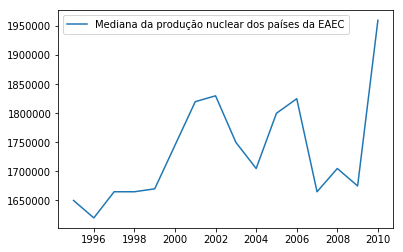

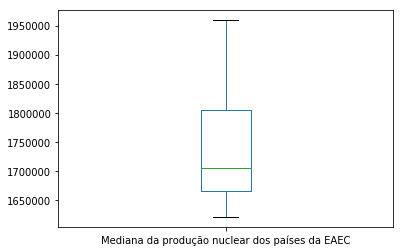

In [29]:
tabela_mediana_.plot()
tabela_mediana_.plot.box()

Queda nos valores de 2005 são consequência de acidentes envolvendo usinas no Reino Unido e Belgica. Já as quedas de 2006 são reflexo de outros dois acidentes que ocorreram nas usinas da Belgica e Suécia.

In [30]:
# tabela_mediana.plot.box()

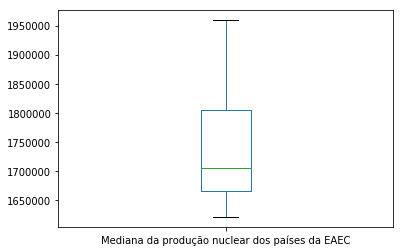

In [31]:
tabela_mediana_.plot.box()

### Produção de energia nuclear dos países fora da EAEC

In [32]:
prod_nuclear_anos_neaec = prod_nuclear.set_index('country')
linhass = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico', 'Argentina', 'Armenia', 'Brazil', 'China', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunass = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_nue =prod_nuclear_anos.loc[linhass, colunass]
z=producao_nuclear95_nue.sort_values(by=2010, ascending=False)
# z.describe()
z
#Para uma comaração mais justa retirei um país dos "fora da organização" disponível nos dados.

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,61400000.0,61500000.0,57300000.0,61400000.0,66400000.0,68600000.0,68200000.0,69200000.0,67700000.0,69900000.0,69700000.0,70200000.0,71900000.0,72000000.0,71400000.0,72100000.0
Japan,25000000.0,26000000.0,27400000.0,28600000.0,27200000.0,27700000.0,27500000.0,25400000.0,20600000.0,24300000.0,26200000.0,26100000.0,22700000.0,22200000.0,24100000.0,24800000.0
Russia,8560000.0,9380000.0,9330000.0,9060000.0,10500000.0,11200000.0,11800000.0,12200000.0,12900000.0,12400000.0,12900000.0,13500000.0,13800000.0,14000000.0,14100000.0,14700000.0
South Korea,5760000.0,6360000.0,6630000.0,7710000.0,8860000.0,9370000.0,9640000.0,10200000.0,11200000.0,11200000.0,12600000.0,12800000.0,12300000.0,13000000.0,12700000.0,12800000.0
Canada,8410000.0,7980000.0,7100000.0,6150000.0,6320000.0,6260000.0,6600000.0,6490000.0,6440000.0,7770000.0,7910000.0,8420000.0,8040000.0,8080000.0,7750000.0,7800000.0
Ukraine,6060000.0,6840000.0,6830000.0,6470000.0,6200000.0,6650000.0,6550000.0,6710000.0,7000000.0,7480000.0,7630000.0,7760000.0,7960000.0,7730000.0,7130000.0,7670000.0
China,1100000.0,1230000.0,1240000.0,1210000.0,1290000.0,1440000.0,1500000.0,2160000.0,3730000.0,4340000.0,4570000.0,4720000.0,5340000.0,5880000.0,6030000.0,6350000.0
Switzerland,2140000.0,2160000.0,2190000.0,2220000.0,2220000.0,2270000.0,2310000.0,2340000.0,2360000.0,2320000.0,2010000.0,2390000.0,2400000.0,2380000.0,2380000.0,2270000.0
Brazil,217000.0,209000.0,273000.0,281000.0,342000.0,520000.0,1230000.0,1190000.0,1150000.0,998000.0,847000.0,1180000.0,1060000.0,1200000.0,1110000.0,1250000.0


In [33]:
# media_nuclear_prod_n_eaec=z.mean()
# tabela_mediaa= pd.DataFrame(data=media_nuclear_prod_n_eaec, columns = ['Media da produção nuclear países fora da EAEC'])
# tabela_mediaa
#Fazer calculo da média não faz sentido para os valores dos meus dados!

In [34]:
mediana_nuclear_prod_n_eaec=z.median()
tabela_mediana= pd.DataFrame(data=mediana_nuclear_prod_n_eaec, columns = ['Mediana da produção nuclear dos países fora da EAEC'])
tabela_mediana
# z.describe()
# tabela_mediana_

,Mediana da produção nuclear dos países fora da EAEC
1995,1620000.0
1996,1695000.0
1997,1715000.0
1998,1715000.0
1999,1755000.0
2000,1855000.0
2001,1905000.0
2002,2250000.0
2003,3045000.0
2004,3330000.0


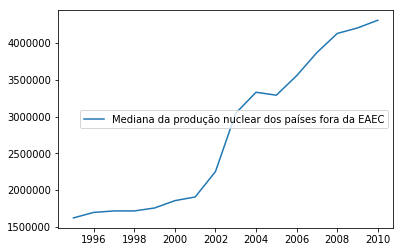

In [35]:
tabela_mediana.plot()

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, **kwargs)>

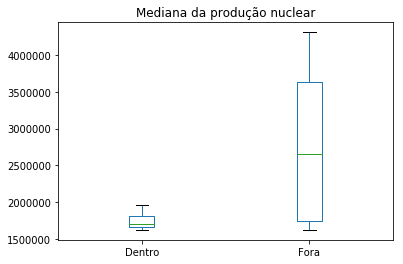

In [36]:
paises_fora=tabela_mediana
paises_dentro=tabela_mediana_

box2 = paises_dentro.join(paises_fora)
box2.plot.box()
plt.title('Mediana da produção nuclear')
plt.gca().set_xticklabels(['Dentro', 'Fora'])
plt.ylabel
# box3 = box2.boxplot(column=['Mediana da produção nuclear dos países da EAEC', 'Mediana da produção nuclear dos países fora da EAEC'])

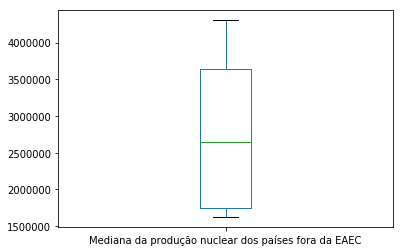

In [37]:
tabela_mediana.plot.box()

In [38]:
prod_nuclear_anos_neaec = prod_nuclear.set_index('country')
linhass = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico', 'Argentina', 'Armenia', 'Brazil', 'China', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunass = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
producao_nuclear95_nue =prod_nuclear_anos.loc[linhass, colunass]
z=producao_nuclear95_nue.sort_values(by=2010, ascending=False)
# z.describe()
z

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,61400000.0,61500000.0,57300000.0,61400000.0,66400000.0,68600000.0,68200000.0,69200000.0,67700000.0,69900000.0,69700000.0,70200000.0,71900000.0,72000000.0,71400000.0,72100000.0
Japan,25000000.0,26000000.0,27400000.0,28600000.0,27200000.0,27700000.0,27500000.0,25400000.0,20600000.0,24300000.0,26200000.0,26100000.0,22700000.0,22200000.0,24100000.0,24800000.0
Russia,8560000.0,9380000.0,9330000.0,9060000.0,10500000.0,11200000.0,11800000.0,12200000.0,12900000.0,12400000.0,12900000.0,13500000.0,13800000.0,14000000.0,14100000.0,14700000.0
South Korea,5760000.0,6360000.0,6630000.0,7710000.0,8860000.0,9370000.0,9640000.0,10200000.0,11200000.0,11200000.0,12600000.0,12800000.0,12300000.0,13000000.0,12700000.0,12800000.0
Canada,8410000.0,7980000.0,7100000.0,6150000.0,6320000.0,6260000.0,6600000.0,6490000.0,6440000.0,7770000.0,7910000.0,8420000.0,8040000.0,8080000.0,7750000.0,7800000.0
Ukraine,6060000.0,6840000.0,6830000.0,6470000.0,6200000.0,6650000.0,6550000.0,6710000.0,7000000.0,7480000.0,7630000.0,7760000.0,7960000.0,7730000.0,7130000.0,7670000.0
China,1100000.0,1230000.0,1240000.0,1210000.0,1290000.0,1440000.0,1500000.0,2160000.0,3730000.0,4340000.0,4570000.0,4720000.0,5340000.0,5880000.0,6030000.0,6350000.0
Switzerland,2140000.0,2160000.0,2190000.0,2220000.0,2220000.0,2270000.0,2310000.0,2340000.0,2360000.0,2320000.0,2010000.0,2390000.0,2400000.0,2380000.0,2380000.0,2270000.0
Brazil,217000.0,209000.0,273000.0,281000.0,342000.0,520000.0,1230000.0,1190000.0,1150000.0,998000.0,847000.0,1180000.0,1060000.0,1200000.0,1110000.0,1250000.0


### Consumo de petróleo dos países participantes da EAEC

In [39]:
consumo_oil_anos=consumo_oil.set_index('country')

          #['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
linhasss = ['Belgium','Bulgaria','Finland','Romania','France','Hungary','Lithuania','Netherlands','Slovak Republic','Spain','Sweden', 'United Kingdom','Denmark','Greece']
colunasss = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
consumo_oil95_ue =consumo_oil_anos.loc[linhasss, colunasss]
y=consumo_oil95_ue.sort_values(by=2010, ascending=False)
y
# linhasss = ['Austria','Belgium','Bulgaria','Czech Republic','Denmark','Finland','Romania','France','Greece','Hungary','Ireland','Lithuania','Netherlands','Poland','Portugal','Slovak Republic','Spain','Sweden', 'United Kingdom']


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
France,89000000,91000000,91700000,95000000,96400000,94900000,95500000,92900000,93100000,94000000,93100000,93000000,91400000,90800000,87500000,84500000
United Kingdom,82200000,84200000,81700000,81200000,79900000,78800000,78700000,78200000,78700000,81000000,83800000,83200000,80700000,79500000,75800000,74900000
Spain,57500000,59100000,61600000,66700000,69000000,69900000,73000000,73700000,76200000,78500000,79300000,79300000,80300000,78000000,73500000,72100000
Netherlands,38700000,38300000,40300000,40500000,41500000,42700000,44800000,44700000,45100000,47100000,50100000,50800000,50700000,47300000,45900000,45900000
Belgium,27700000,30200000,31000000,31300000,30100000,30900000,31000000,31700000,33700000,33700000,33600000,33800000,34600000,36000000,31500000,32700000
Greece,16600000,17400000,17700000,18600000,18000000,18900000,19300000,19400000,20300000,20100000,20100000,21300000,21400000,20400000,19500000,18100000
Sweden,17100000,18500000,17100000,17200000,17100000,15900000,16000000,16500000,17700000,17500000,17200000,17300000,16900000,16700000,15500000,16200000
Finland,10200000,10400000,10300000,10800000,10900000,10900000,10700000,11100000,11500000,10700000,11100000,10700000,10800000,10700000,10100000,10600000
Romania,13500000,13000000,13700000,12000000,9480000,9980000,10600000,10600000,9430000,10900000,10500000,10300000,10300000,10400000,9190000,8750000


In [40]:
mediana_nuclear_cons_eaec=y.median()
tabela_medianaaa= pd.DataFrame(data=mediana_nuclear_cons_eaec, columns = ['Mediana do consumo de petróleo dos países da EAEC'])
tabela_medianaaa
# z.describe()


,Mediana do consumo de petróleo dos países da EAEC
1995,15050000.0
1996,15200000.0
1997,15400000.0
1998,14600000.0
1999,14000000.0
2000,13400000.0
2001,13350000.0
2002,13800000.0
2003,14600000.0
2004,14200000.0


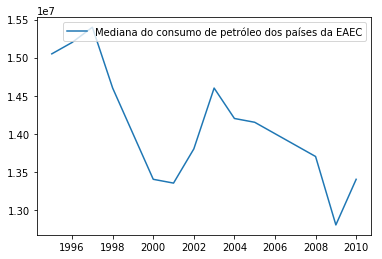

In [41]:
tabela_medianaaa.plot()

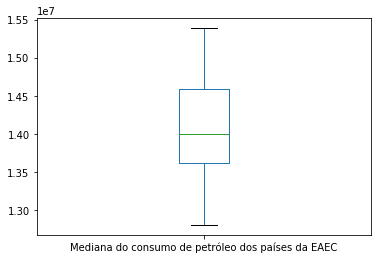

In [42]:
tabela_medianaaa.plot.box()

### Consumo de petróleo dos países não participantes da EAEC

In [43]:
consumo_oil_anos= consumo_oil.set_index('country')
# linhas2 = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico', 'Argentina', 'Armenia', 'Brazil', 'China', 'India', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
linhas2 = ['United States', 'South Korea', 'Japan', 'Canada', 'Switzerland', 'Mexico','Philippines', 'Argentina','Brazil', 'China', 'India', 'Pakistan', 'Russia', 'South Africa', 'Ukraine']
colunas2 = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
consumo_oil95_nue =consumo_oil_anos.loc[linhas2, colunas2]
v=consumo_oil95_nue.sort_values(by=2010, ascending=False)
v

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United States,796000000,824000000,835000000,851000000,874000000,883000000,883000000,884000000,899000000,935000000,938000000,931000000,929000000,875000000,833000000,850000000
China,160000000,176000000,192000000,197000000,209000000,224000000,229000000,248000000,277000000,323000000,329000000,353000000,371000000,378000000,393000000,448000000
Japan,269000000,271000000,267000000,256000000,261000000,257000000,249000000,244000000,250000000,244000000,247000000,238000000,231000000,225000000,200000000,203000000
India,75200000,81100000,86500000,92500000,100000000,106000000,107000000,113000000,116000000,119000000,122000000,128000000,138000000,145000000,153000000,155000000
Russia,151000000,130000000,128000000,123000000,126000000,123000000,127000000,122000000,126000000,125000000,125000000,130000000,130000000,134000000,128000000,133000000
Brazil,82200000,87200000,92500000,95800000,96800000,94400000,96100000,95300000,92300000,96000000,99000000,100000000,107000000,116000000,117000000,127000000
South Korea,94800000,101000000,111000000,93900000,101000000,104000000,104000000,105000000,106000000,105000000,105000000,105000000,108000000,103000000,104000000,105000000
Canada,81100000,83500000,86700000,88600000,90000000,90100000,91300000,93800000,97400000,101000000,99600000,98700000,102000000,101000000,94400000,101000000
Mexico,74800000,76800000,79900000,84200000,84100000,88100000,86600000,82800000,85000000,88500000,90800000,89700000,92000000,91600000,88500000,88600000


In [44]:
mediana_oil_cons_neaec=v.median()
tabela_medianaaaa= pd.DataFrame(data=mediana_oil_cons_neaec, columns = ['Mediana do consumo de petróleo dos países fora da EAEC'])
tabela_medianaaaa
# v.describe()

,Mediana do consumo de petróleo dos países fora da EAEC
1995,75200000.0
1996,81100000.0
1997,86500000.0
1998,88600000.0
1999,90000000.0
2000,90100000.0
2001,91300000.0
2002,93800000.0
2003,92300000.0
2004,96000000.0


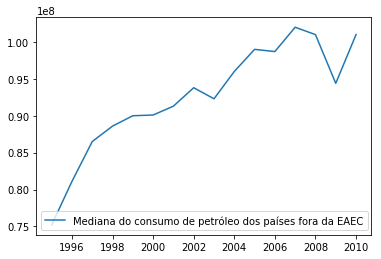

In [45]:
tabela_medianaaaa.plot()

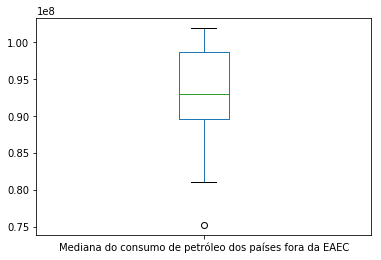

In [46]:
tabela_medianaaaa.plot.box()

### Produção de petróleo dos países participantes da EAEC

In [47]:
# prod_nuclear
# prod_nuclear_anos = prod_nuclear.set_index('country')
# linhas = ['Belgium','Bulgaria','Italy','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
# colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]
# producao_nuclear95_ue =prod_nuclear_anos.loc[linhas, colunas]
# producao_nuclear95_ue.sort_values(by=2011, ascending=False)

prod_oil
prod_oil_anos=prod_oil.set_index('country')
linhas = ['Denmark', 'Italy', 'Romania', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
prod_oil95_ue = prod_oil_anos.loc[linhas, colunas]
p=prod_oil95_ue.sort_values(by=2010, ascending=False)
p


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
United Kingdom,130000000.0,130000000.0,128000000.0,133000000.0,137000000.0,126000000.0,117000000.0,116000000.0,106000000.0,95600000.0,85100000.0,76900000.0,76900000.0,72000000.0,68300000.0,63200000.0
Denmark,9060000.0,10200000.0,11200000.0,11600000.0,14600000.0,17700000.0,17000000.0,18100000.0,17900000.0,19100000.0,18500000.0,16800000.0,15200000.0,14000000.0,12900000.0,12200000.0
Italy,5240000.0,5450000.0,5950000.0,5620000.0,5020000.0,4590000.0,4130000.0,5530000.0,5570000.0,5470000.0,6110000.0,5770000.0,5860000.0,5240000.0,4570000.0,5110000.0
Romania,6950000.0,6850000.0,6750000.0,6550000.0,6380000.0,6290000.0,6240000.0,6070000.0,5890000.0,5710000.0,5440000.0,5000000.0,4750000.0,4720000.0,4500000.0,4290000.0


In [48]:
# mediana_oil_cons_neaec=v.median()
# tabela_medianaaaa= pd.DataFrame(data=mediana_oil_cons_neaec, columns = ['Mediana do consumo de petróleo dos países fora da EAEC'])
# tabela_medianaaaa
# # v.describe()
prod_oil_eaec=p.median()
tab_mediana=pd.DataFrame(data=prod_oil_eaec, columns = ['Mediana da produção de petróleo dos países da EAEC'])
tab_mediana
# p.describe()



,Mediana da produção de petróleo dos países da EAEC
1995,8005000.0
1996,8525000.0
1997,8975000.0
1998,9075000.0
1999,10490000.0
2000,11995000.0
2001,11620000.0
2002,12085000.0
2003,11895000.0
2004,12405000.0


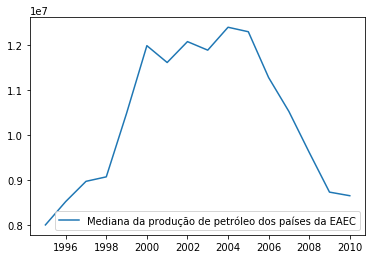

In [49]:
tab_mediana.plot()

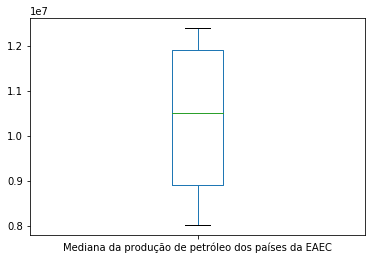

In [50]:
tab_mediana.plot.box()

### Produção de petróleo dos países não participantes da EAEC ###

In [51]:
prod_oil_anos=prod_oil.set_index('country')
linhas = ['United States', 'Canada', 'Mexico', 'Argentina', 'Brazil', 'China', 'India', 'Russia']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
prod_oil95_nue = prod_oil_anos.loc[linhas, colunas]
g=prod_oil95_nue.sort_values(by=2010, ascending=False)
g

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Russia,311000000.0,303000000.0,307000000.0,304000000.0,305000000.0,327000000.0,352000000.0,384000000.0,426000000.0,463000000.0,475000000.0,486000000.0,497000000.0,494000000.0,501000000.0,512000000.0
United States,384000000.0,382000000.0,380000000.0,368000000.0,353000000.0,348000000.0,345000000.0,342000000.0,333000000.0,325000000.0,309000000.0,305000000.0,305000000.0,302000000.0,322000000.0,333000000.0
China,149000000.0,159000000.0,160000000.0,160000000.0,160000000.0,163000000.0,165000000.0,167000000.0,170000000.0,174000000.0,181000000.0,185000000.0,186000000.0,190000000.0,189000000.0,203000000.0
Canada,112000000.0,115000000.0,121000000.0,125000000.0,121000000.0,125000000.0,126000000.0,133000000.0,140000000.0,145000000.0,142000000.0,151000000.0,155000000.0,153000000.0,153000000.0,160000000.0
Mexico,150000000.0,162000000.0,170000000.0,173000000.0,165000000.0,170000000.0,176000000.0,178000000.0,188000000.0,190000000.0,186000000.0,183000000.0,172000000.0,157000000.0,147000000.0,146000000.0
Brazil,37500000.0,42500000.0,45600000.0,52700000.0,59500000.0,67100000.0,70200000.0,78600000.0,81500000.0,80900000.0,89000000.0,94000000.0,95400000.0,99100000.0,106000000.0,112000000.0
India,36600000.0,34800000.0,35600000.0,34700000.0,34600000.0,34200000.0,34100000.0,35200000.0,35400000.0,36300000.0,34900000.0,36000000.0,36400000.0,37800000.0,38000000.0,41300000.0
Argentina,37500000.0,40800000.0,43400000.0,44000000.0,41700000.0,41400000.0,44000000.0,43300000.0,43200000.0,41100000.0,39400000.0,39500000.0,38300000.0,37800000.0,34000000.0,33300000.0


In [52]:
prod_oil_n_eaec=g.median()
tab_medianaa=pd.DataFrame(data=prod_oil_n_eaec, columns = ['Mediana da produção de petróleo dos países fora da EAEC'])


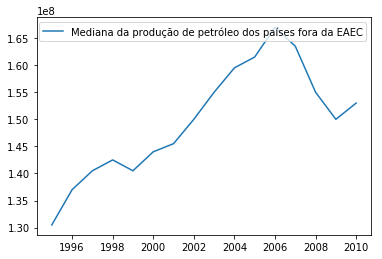

In [53]:
tab_medianaa.plot()

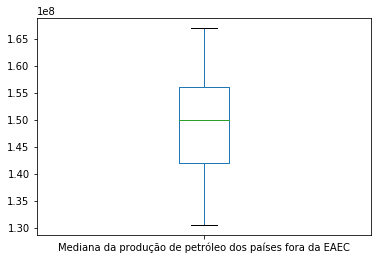

In [54]:
tab_medianaa.plot.box()

In [55]:
gdpp= gdp_ppp.set_index('country')
linhas = ['Belgium','Bulgaria','Lithuania','Netherlands','Finland','Romania','France','Slovak Republic', 'Germany','Slovenia', 'Spain', 'Hungary','Sweden', 'United Kingdom']
colunas = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
gdp_eaec=gdpp.loc[linhas, colunas]
gdp_eaec

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Belgium,323000000000,327000000000,337000000000,344000000000,355000000000,369000000000,372000000000,378000000000,383000000000,396000000000,404000000000,4.150000e+11,4.260000e+11,4.300000e+11,4.170000e+11,4.260000e+11
Bulgaria,77200000000,70000000000,66300000000,69200000000,70900000000,74900000000,78200000000,82300000000,86100000000,92000000000,98000000000,1.040000e+11,1.110000e+11,1.180000e+11,1.110000e+11,1.120000e+11
Lithuania,35900000000,37400000000,39700000000,42300000000,41300000000,42700000000,45300000000,48300000000,52900000000,56700000000,60900000000,6.570000e+10,7.220000e+10,7.420000e+10,6.320000e+10,6.490000e+10
Netherlands,497000000000,517000000000,541000000000,564000000000,591000000000,615000000000,628000000000,630000000000,635000000000,652000000000,665000000000,6.900000e+11,7.180000e+11,7.310000e+11,7.030000e+11,7.130000e+11
Finland,134000000000,140000000000,148000000000,157000000000,163000000000,171000000000,175000000000,178000000000,181000000000,188000000000,194000000000,2.030000e+11,2.140000e+11,2.140000e+11,1.960000e+11,2.030000e+11
Romania,264000000000,274000000000,257000000000,244000000000,240000000000,245000000000,258000000000,270000000000,282000000000,306000000000,317000000000,3.420000e+11,3.630000e+11,3.890000e+11,3.630000e+11,3.590000e+11
France,1780000000000,1800000000000,1840000000000,1900000000000,1960000000000,2040000000000,2080000000000,2100000000000,2110000000000,2160000000000,2180000000000,2.230000e+12,2.280000e+12,2.280000e+12,2.210000e+12,2.250000e+12
Slovak Republic,71200000000,76200000000,80600000000,83600000000,83900000000,84600000000,87300000000,90900000000,94800000000,99900000000,106000000000,1.150000e+11,1.270000e+11,1.350000e+11,1.280000e+11,1.330000e+11
Germany,2690000000000,2720000000000,2770000000000,2820000000000,2870000000000,2960000000000,2990000000000,2990000000000,2990000000000,3020000000000,3040000000000,3.170000e+12,3.280000e+12,3.310000e+12,3.150000e+12,3.270000e+12


In [56]:
consumo_oil.set_index('country', inplace=True)

In [57]:
consumo_oil = consumo_oil.loc[linhas, colunas]

C:\Users\Vitor Bandeira\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


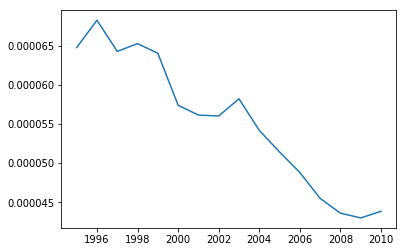

In [58]:
t=consumo_oil.median()
g=gdp_eaec.median()
f=t/g
f.plot()


In [59]:
gdp_eaec_mediana
consumo_oil

NameError: name 'gdp_eaec_mediana' is not defined

In [61]:
stack_consumo_oil = consumo_oil.stack()
stack_gdp_eaec = gdp_eaec.stack()

In [62]:
dataf_consumo_gdp_eaec = pd.DataFrame({'GDP': stack_gdp_eaec, 'Consumo petrólio': stack_consumo_oil})
dataf_consumo_gdp_eaec

GDP  Consumo petrólio
country                                            
Belgium        1995  3.230000e+11        27700000.0
               1996  3.270000e+11        30200000.0
               1997  3.370000e+11        31000000.0
               1998  3.440000e+11        31300000.0
               1999  3.550000e+11        30100000.0
               2000  3.690000e+11        30900000.0
               2001  3.720000e+11        31000000.0
               2002  3.780000e+11        31700000.0
               2003  3.830000e+11        33700000.0
               2004  3.960000e+11        33700000.0
               2005  4.040000e+11        33600000.0
               2006  4.150000e+11        33800000.0
               2007  4.260000e+11        34600000.0
               2008  4.300000e+11        36000000.0
               2009  4.170000e+11        31500000.0
               2010  4.260000e+11        32700000.0
Bulgaria       1995  7.720000e+10         4870000.0
               1996  7.000000e+10         4290000.0
               1997  6.630000e+10         4250000.0
               1998  6.920000e+10         4430000.0
               1999  7.090000e+10         4120000.0
               2000  7.490000e+10         4110000.0
               2001  7.820000e+10         4220000.0
               2002  8.230000e+10         4220000.0
               2003  8.610000e+10         4420000.0
               2004  9.200000e+10         4300000.0
               2005  9.800000e+10         4830000.0
               2006  1.040000e+11         4970000.0
               2007  1.110000e+11         4840000.0
               2008  1.180000e+11         4770000.0
...                           ...               ...
Sweden         1997  2.750000e+11        17100000.0
               1998  2.830000e+11        17200000.0
               1999  2.940000e+11        17100000.0
               2000  3.090000e+11        15900000.0
               2001  3.120000e+11        16000000.0
               2002  3.190000e+11        16500000.0
               2003  3.260000e+11        17700000.0
               2004  3.400000e+11        17500000.0
               2005  3.520000e+11        17200000.0
               2006  3.670000e+11        17300000.0
               2007  3.800000e+11        16900000.0
               2008  3.770000e+11        16700000.0
               2009  3.580000e+11        15500000.0
               2010  3.800000e+11        16200000.0
United Kingdom 1995  1.530000e+12        82200000.0
               1996  1.580000e+12        84200000.0
               1997  1.630000e+12        81700000.0
               1998  1.690000e+12        81200000.0
               1999  1.760000e+12        79900000.0
               2000  1.830000e+12        78800000.0
               2001  1.890000e+12        78700000.0
               2002  1.940000e+12        78200000.0
               2003  2.010000e+12        78700000.0
               2004  2.070000e+12        81000000.0
               2005  2.110000e+12        83800000.0
               2006  2.170000e+12        83200000.0
               2007  2.240000e+12        80700000.0
               2008  2.210000e+12        79500000.0
               2009  2.120000e+12        75800000.0
               2010  2.150000e+12        74900000.0

[224 rows x 2 columns]

C:\Users\Vitor Bandeira\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


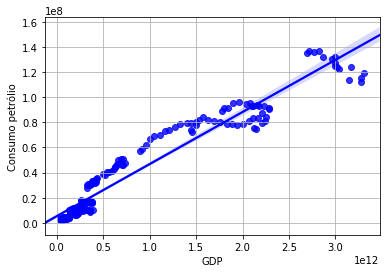

Correlação: 0.9697816711562737



In [63]:
# dataf_consumo_gdp_eaec.plot.scatter('GDP', 'Consumo petrólio')
correlation=dataf_consumo_gdp_eaec.corr()
sns.regplot(dataf_consumo_gdp_eaec['GDP'], dataf_consumo_gdp_eaec['Consumo petrólio'], color=('blue'))
plt.grid()
plt.show()
print("Correlação: {}\n".format(correlation['GDP']['Consumo petrólio']))

In [ ]:
# ano=consumo_oil.transpose()
# l = [1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]
# c = [country]
# consumo_oilanos =ano.loc[l, c]
# consumo_oilanos
    

In [ ]:
# fazer grafico de petroleo/gdp por ano

In [ ]:
oilporgdp=stack_consumo_oil/stack_gdp_eaec
oilporgdp
dataf_oil_por_gdp_ano = pd.DataFrame({'Petróleo/GDP': oilporgdp})
dataf_oil_por_gdp_ano

In [ ]:
dataf_consumo_gdp_eaec

In [ ]:
dataf_consumo_gdp_eaec

In [ ]:
x
stack_prod_nuclear = x.stack()
stack_gdp_eaec = gdp_eaec.stack()

In [ ]:
dataf_prodnuc_gdp_eaec = pd.DataFrame({'GDP': stack_gdp_eaec, 'Produção nuclear': stack_prod_nuclear})

In [ ]:
dataf_prodnuc_gdp_eaec

In [ ]:
correlationn=dataf_prodnuc_gdp_eaec.corr()
sns.regplot(dataf_prodnuc_gdp_eaec['GDP'], dataf_prodnuc_gdp_eaec['Produção nuclear'], color=('blue'))
plt.grid()
plt.show()
print("Correlação: {}\n".format(correlationn['GDP']['Produção nuclear']))

In [ ]:
mediana_nuclear_prod_eaec=x.median()
tabela_mediana_= pd.DataFrame(data=mediana_nuclear_prod_eaec, columns = ['Mediana da produção nuclear dos países da EAEC'])
tabela_mediana_
# x.describe()

In [ ]:
gdp_eaec_mediana=gdp_eaec.median()
tabela_mediana_gdp = pd.DataFrame(data=gdp_eaec_mediana, columns = ['Mediana da GDP dos países da EAEC'])
tabela_mediana_gdp

In [ ]:
b = tabela_mediana_gdp.join(tab_mediana)
b

In [ ]:
corre=b.corr()

sns.regplot(b['Mediana da GDP dos países da EAEC'], b['Mediana da produção de petróleo dos países da EAEC'], color=('blue'))
# plt.xlabel('Prod. energia nuclear dos países da EAEC')
# plt.xlabel('Consumo petróleo dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(corre['Mediana da GDP dos países da EAEC']['Mediana da produção de petróleo dos países da EAEC']))

In [ ]:
q = tabela_mediana_gdp.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
q

In [ ]:
correl=q.corr()

sns.regplot(q['Mediana da GDP dos países da EAEC'], q['Mediana do consumo de petróleo dos países da EAEC'], color=('blue'))
# plt.xlabel('Prod. energia nuclear dos países da EAEC')
# plt.xlabel('Consumo petróleo dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(correl['Mediana da GDP dos países da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

###  Comparações / Conclusão:

In [ ]:
tabi=tabela_medianaaa/10
df = tabela_mediana_.join(tabi, lsuffix='Energia Nuclear', rsuffix='Petróleo')
df


In [ ]:
df.plot()
# df.set(xlabel="x label", ylabel="y label")


Unidades do gráfico: X: Anos Y: Toneladas de petróleo

In [ ]:
cor=df.corr()

sns.regplot(df['Mediana da produção nuclear dos países da EAEC'], df['Mediana do consumo de petróleo dos países da EAEC'], color=('blue'))
# plt.xlabel('Prod. energia nuclear dos países da EAEC')
# plt.xlabel('Consumo petróleo dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(cor['Mediana da produção nuclear dos países da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

***É valido para tirar alguma conclusão?***
analise com gdp

In [ ]:
df[['Mediana da produção nuclear dos países da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].cov()

In [ ]:

df[['Mediana da produção nuclear dos países da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].corr()
#talves se analisar uma janela de dados  maior (mais anos) o correlação aumente?

In [ ]:
tabela_medianaaa.plot()
oil_cons = tabela_medianaaaa.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
oil_cons
# tbaaaa=tabela_medianaaaa/10
# tbaaaa.plot()
oil_cons = tbaaaa.join(tabela_medianaaa, lsuffix='Energia Nuclear', rsuffix='Petróleo')
oil_cons

In [ ]:
oil_cons.plot()

In [ ]:
cor_=oil.corr()

sns.regplot(oil['Mediana do consumo de petróleo dos países fora da EAEC'], oil['Mediana do consumo de petróleo dos países da EAEC'])
# plt.xlabel('Consumo pet. dos países fora da EAEC')
# plt.ylabel('Consumo pet. dos países da EAEC')
plt.grid()
plt.show()
print("Correlação: {}\n".format(cor_['Mediana do consumo de petróleo dos países fora da EAEC']['Mediana do consumo de petróleo dos países da EAEC']))

In [ ]:
oil[['Mediana do consumo de petróleo dos países fora da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].cov()

In [ ]:
oil[['Mediana do consumo de petróleo dos países fora da EAEC', 'Mediana do consumo de petróleo dos países da EAEC']].corr()

Após a análise conjunta de todas as variáveis é possível concluir, que há sim um relação entre consumo e gastos em petróleo com o aumento da produção de energia nuclear dentro da EAEC, onde os países participantes fazem mais uso da energia nuclear diminuindo o consumo e gerando menos gastos. Pois, com o desenvolvimento do mercado de energia nuclear os países que produzem acabam distribuindo para membros que necessitam, assim fazendo com que todos acabem diminuindo gastos. É possivel observar através dos gráficos o aumento na produção de energia nuclear, não so na EAEC mas sim no mundo inteiro, porém, a eficácia da hipótese pode ser observada quando comparamos a mediana do consumo de petróleo dos países da organização com os que estão fora, é notável e de fácil conclusão, principalmente após analisarmos o gráfico de correlação entre a mediana da produção com a mediana de consumo de petróleo, que os membros da EAEC passam a consumir bem menos enquanto os que estão fora só crescem, isso acontece por conta da distribuição de energia que ocorre entre os membros. Ao analisarmos a relação do consumo de petróleo com o PIB, é possivel perceber que os países que possuem PIBs altos, ou seja, são desenvolvidos, passam a necessitar cada vez de mais energia, isso é facilmente compreendido quando lembramos que um PIB elevado significa que há um mercado desenvolvido para garantir consumo igualmente forte e um setor industrial capaz de garantir essa produção, que só leva a um PIB cada vez mais crescente, e por consequencia mais consumo de energia. Essa necessidade por mais energia tambem pode ser observada no gráfico de correlação entre o PIB e a produção de enrgia nuclear, pois quanto maior o PIB maior é a carência por energia. Por fim, conseguimos sedimentar mais nossa hipótese ao ver a relação de consumo de petróleo divido pelo PIB por ano, que nos da evidências que houve um aumento no PIB dos países e diminuição do consumo de petróleo que foi causado pelo aumento do consumo e produção da energia nuclear.